# **Problem Statement:** 
To identify the letters of the English alphabet, from the Avila Bible's sample containing 10437 characters

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
columns = ['intercolumnar_distance', 'upper_margin' ,'lower_margin' ,'exploitation' ,'row_number' ,'modular_ratio', 
           'interlinear_spacing', 'weight','peak_number','modular ratio/interlinear spacing','class']

train = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Machine Learning/Week3/avila_train.csv', header = 1, names = columns )
test = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Machine Learning/Week3/avila_test.csv', header = 1, names = columns)


In [16]:
train.head()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular ratio/interlinear spacing,class
0,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
1,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
2,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
3,0.117948,-0.220579,-3.210528,-1.623238,0.261718,-0.349509,0.257927,-0.385979,-0.247731,-0.331310,A
4,0.389513,-0.220579,-3.210528,-2.624155,0.261718,-0.764757,0.484429,-0.597510,-0.372457,-0.810261,A


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10428 entries, 0 to 10427
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   intercolumnar_distance             10428 non-null  float64
 1   upper_margin                       10428 non-null  float64
 2   lower_margin                       10428 non-null  float64
 3   exploitation                       10428 non-null  float64
 4   row_number                         10428 non-null  float64
 5   modular_ratio                      10428 non-null  float64
 6   interlinear_spacing                10428 non-null  float64
 7   weight                             10428 non-null  float64
 8   peak_number                        10428 non-null  float64
 9   modular ratio/interlinear spacing  10428 non-null  float64
 10  class                              10428 non-null  object 
dtypes: float64(10), object(1)
memory usage: 896.3+ KB


In [18]:
pd.DataFrame({'train' : train['class'].value_counts() ,
              '% in train' : [round(x/len(train['class']), 4) for x in train['class'].value_counts()],
              'test' : test['class'].value_counts(),
             '% in test' : [round(x/len(test['class']), 4) for x in test['class'].value_counts()]})

,train,% in train,test,% in test
A,4284,0.4108,4285,0.4106
F,1961,0.1881,1962,0.1880
E,1095,0.1050,1095,0.1049
I,831,0.0797,832,0.0797
X,522,0.0501,522,0.0500
H,519,0.0498,520,0.0498
G,446,0.0428,447,0.0428
D,352,0.0338,353,0.0338
Y,266,0.0255,267,0.0256
C,103,0.0099,103,0.0099


In [19]:
sns.pairplot(train, diag_kind = 'kde', hue = 'class')
plt.show()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7faf43fd6050> (for post_execute):


KeyboardInterrupt: ignored

In [20]:
X_train = train.drop(columns= 'class')
y_train = train['class']

X_test = test.drop(columns='class')
y_test = test['class']

# Train and evaluate models
### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'liblinear', multi_class= 'auto')

logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [22]:
lr_score = logreg.score(X_test, y_test)
print(f"Score : {lr_score}")

Score : 0.5308097747963584


- The accuracy is 53%, possibly because of the class imbalance
- Since it is a multi-class problem, simple accuracy does not give us the whole picture
- Let's check what percentage of each class has the model got right

In [23]:
pred = logreg.predict(X_test)  

In [24]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()  # empty dataframe

    for i in np.sort(actual.unique()):
        try:  # because we get a key error if we use value_counts()[i] when the given class i does not exist in the value_count() array
            a.loc[i,'total_instances'] = len(actual[actual == i]) # value count of a given class i
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i] # number of instances where a given class i was identified correctly
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)  # percentage of predictions that were correct for a given class
        except:  # if the key error discussed above occurs, assign the percentage = 0
            a.loc[i, '%'] = 0.0
    return a

In [25]:
pred_vs_actual_lr = rightly_identified(y_test, pred)
pred_vs_actual_lr

,total_instances,identified_right,%
A,4285.0,4158.0,97.0
B,5.0,2.0,40.0
C,103.0,NaN,0.0
D,353.0,NaN,0.0
E,1095.0,75.0,6.8
F,1962.0,55.0,2.8
G,447.0,NaN,0.0
H,520.0,40.0,7.7
I,832.0,735.0,88.3
W,44.0,NaN,0.0


- the model has got 97% of 'A's right, likely because that was the dominant class in the dataset
- 0% of 'C's, 'D's, 'G's and 'W's were identified correctly
- Even though there were only 5 records of 'B' for the model to train, the model correctly identified 2 of the 'B's in test set

In [26]:
def con_matrix(actual, predictions):
    from sklearn.metrics import confusion_matrix

    matrix = pd.DataFrame(confusion_matrix(actual, predictions), columns = np.unique(actual), index = np.unique(actual))
    # confusion_matrix() returns the confusion matrix. Wrapping this matrix in a dataframe with appropriate column names and index
    matrix.loc[:,'total_count_actual_class'] = matrix.sum(axis = 1)  # sum accross the columns
    matrix.loc['total_count_predicted'] = matrix.sum(axis = 0)  # row sum
    return matrix

In [27]:
con_matrix(y_test, pred)

,A,B,C,D,E,F,G,H,I,W,X,Y,total_count_actual_class
A,4158,0,0,0,31,63,0,8,18,0,5,2,4285
B,3,2,0,0,0,0,0,0,0,0,0,0,5
C,80,0,0,0,9,11,0,0,3,0,0,0,103
D,327,0,0,0,5,6,0,14,0,0,1,0,353
E,917,0,0,0,75,54,0,10,10,0,28,1,1095
F,1881,0,0,0,4,55,0,4,14,0,0,4,1962
G,413,0,0,0,4,23,0,4,0,0,3,0,447
H,366,0,0,0,31,66,0,40,15,0,1,1,520
I,63,0,0,0,2,4,0,3,735,0,15,10,832
W,33,0,0,0,9,0,0,0,0,0,2,0,44


- The above table shows what is called as the 'Confusion matrix' and we have appended totals to it
- The diagonal values tell us the count of correct predictions
- From the table we can see, the model classified 8391 instances from a total of 10437 test reccords as 'A' while only 4158 of them were correct
- 'B' looks like the most unique letter of all because the model did not classify 'B' to be anything else except 'B' and 'A'

### KNN

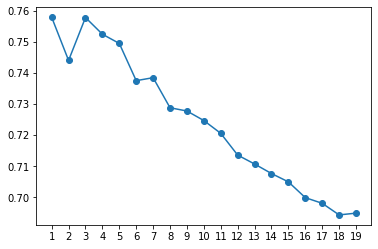

In [29]:
from sklearn.neighbors import KNeighborsClassifier

kscores = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    s = knn.score(X_test, y_test)
    kscores.append(s)
plt.plot(range(1,20), kscores, 'o-')   
plt.xticks(range(1,20))
plt.show()

In [30]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# y_pred = NNH.predict(X_test)

knn_score = knn.score(X_test, y_test)
print(f"Score : {knn_score}")

Score : 0.7578342117872544


In [32]:
pred = knn.predict(X_test)

In [33]:
pred_vs_actual_knn = rightly_identified(y_test, pred)
pred_vs_actual_knn

,total_instances,identified_right,%
A,4285.0,3685.0,86.0
B,5.0,5.0,100.0
C,103.0,45.0,43.7
D,353.0,195.0,55.2
E,1095.0,712.0,65.0
F,1962.0,1305.0,66.5
G,447.0,235.0,52.6
H,520.0,276.0,53.1
I,832.0,788.0,94.7
W,44.0,26.0,59.1


In [34]:
con_matrix(y_test, pred)

,A,B,C,D,E,F,G,H,I,W,X,Y,total_count_actual_class
A,3685,0,2,18,49,446,44,33,2,0,3,3,4285
B,0,5,0,0,0,0,0,0,0,0,0,0,5
C,36,0,45,2,8,12,0,0,0,0,0,0,103
D,84,0,6,195,24,36,1,5,1,0,1,0,353
E,213,0,13,30,712,65,11,38,1,0,10,2,1095
F,586,0,2,8,16,1305,32,11,2,0,0,0,1962
G,131,0,0,0,22,52,235,6,0,0,1,0,447
H,145,0,5,3,41,41,8,276,0,0,1,0,520
I,26,0,0,2,4,3,1,1,788,0,1,6,832
W,12,0,0,0,3,1,0,0,0,26,2,0,44


- All the 'B's were rightly identified to be 'B's and we have also earlier seen that 'B' is probably quiet unique from the other letters
- Performance of k-NN is much better than that of Logistic regression

### Naive Bayes'

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [36]:
nb_score = nb.score(X_test, y_test)
print(f"Score : {nb_score}")

Score : 0.29324389075227597


In [37]:
pred = nb.predict(X_test)
pred_vs_actual_nb = rightly_identified(y_test, pred)
pred_vs_actual_nb

,total_instances,identified_right,%
A,4285.0,272.0,6.3
B,5.0,5.0,100.0
C,103.0,8.0,7.8
D,353.0,86.0,24.4
E,1095.0,98.0,8.9
F,1962.0,822.0,41.9
G,447.0,313.0,70.0
H,520.0,424.0,81.5
I,832.0,564.0,67.8
W,44.0,22.0,50.0


In [38]:
con_matrix(y_test, pred)

,A,B,C,D,E,F,G,H,I,W,X,Y,total_count_actual_class
A,272,0,88,327,168,1309,1059,673,107,106,146,30,4285
B,0,5,0,0,0,0,0,0,0,0,0,0,5
C,17,0,8,3,2,42,7,11,9,2,2,0,103
D,12,0,0,86,17,136,18,77,2,0,4,1,353
E,15,0,16,31,98,349,96,332,26,18,102,12,1095
F,77,0,21,100,55,822,462,376,28,6,11,4,1962
G,23,0,1,6,8,59,313,15,2,5,15,0,447
H,11,0,5,2,0,5,61,424,12,0,0,0,520
I,67,0,11,1,17,65,0,3,564,14,36,54,832
W,0,0,0,6,0,4,6,0,0,22,6,0,44


- 'B' seems to be the easiest letter to identify
- 'A' is the toughest letter for Naive Bayes' to identify
- Let's put all the models' results together to do a comparision

In [39]:
result = {}

result['Logistic Regression'] = pred_vs_actual_lr
result['k-NN'] = pred_vs_actual_knn.drop(columns= 'total_instances')
result["Naive Bayes'"] = pred_vs_actual_nb.drop(columns= 'total_instances')

In [40]:
pd.concat(result, axis = 1)

Logistic Regression                                    k-NN         \
      total_instances identified_right     % identified_right      %   
A              4285.0           4158.0  97.0           3685.0   86.0   
B                 5.0              2.0  40.0              5.0  100.0   
C               103.0              NaN   0.0             45.0   43.7   
D               353.0              NaN   0.0            195.0   55.2   
E              1095.0             75.0   6.8            712.0   65.0   
F              1962.0             55.0   2.8           1305.0   66.5   
G               447.0              NaN   0.0            235.0   52.6   
H               520.0             40.0   7.7            276.0   53.1   
I               832.0            735.0  88.3            788.0   94.7   
W                44.0              NaN   0.0             26.0   59.1   
X               522.0            349.0  66.9            435.0   83.3   
Y               267.0            125.0  46.8            201.0   75.3   

      Naive Bayes'         
  identified_right      %  
A            272.0    6.3  
B              5.0  100.0  
C              8.0    7.8  
D             86.0   24.4  
E             98.0    8.9  
F            822.0   41.9  
G            313.0   70.0  
H            424.0   81.5  
I            564.0   67.8  
W             22.0   50.0  
X            345.0   66.1  
Y            101.0   37.8

In [41]:
pd.DataFrame({'Accuracy' : [lr_score, knn_score, nb_score]}, index = ['Logistic Regression', 'k-NN', 'Naive Bayes'] )

,Accuracy
Logistic Regression,0.530810
k-NN,0.757834
Naive Bayes,0.293244


- k-NN has arguably performed the best of all the models
- Naive Bayes', even though has the least accuracy it has been able to identify 'G' and 'H' better than all the other models